In [1]:
%cd /content/drive/MyDrive/Agriculture App/agriculture-predictor-planner

/content/drive/MyDrive/Agriculture App/agriculture-predictor-planner


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crop_data = pd.read_csv('data/merged/crop_soil_weather_merged.csv')
print(crop_data.head())


In [ ]:
pd.set_option('display.max_columns', None)
crop_data.info(verbose=True)

In [ ]:
#Converting data types so that district code, year, and state code are not treated as numeric during calculations
crop_data = crop_data.astype({'Dist Code':'category', 'Year':'datetime64[ns]', 'State Code':'category', 'State Name':'category', 'Dist Name':'category'})

print(crop_data.info(verbose=True))

In [13]:
crops = ['RICE', 'WHEAT', 'KHARIF SORGHUM', 'RABI SORGHUM', 'SORGHUM', 'PEARL MILLET', 'MAIZE', 'FINGER MILLET', 'BARLEY', 'CHICKPEA', 'PIGEONPEA', 'MINOR PULSES', 'GROUNDNUT', 'SESAMUM', 'RAPESEED AND MUSTARD', 'SAFFLOWER', 'CASTOR', 'SUNFLOWER', 'SOYABEAN', 'OILSEEDS', 'SUGARCANE', 'COTTON']


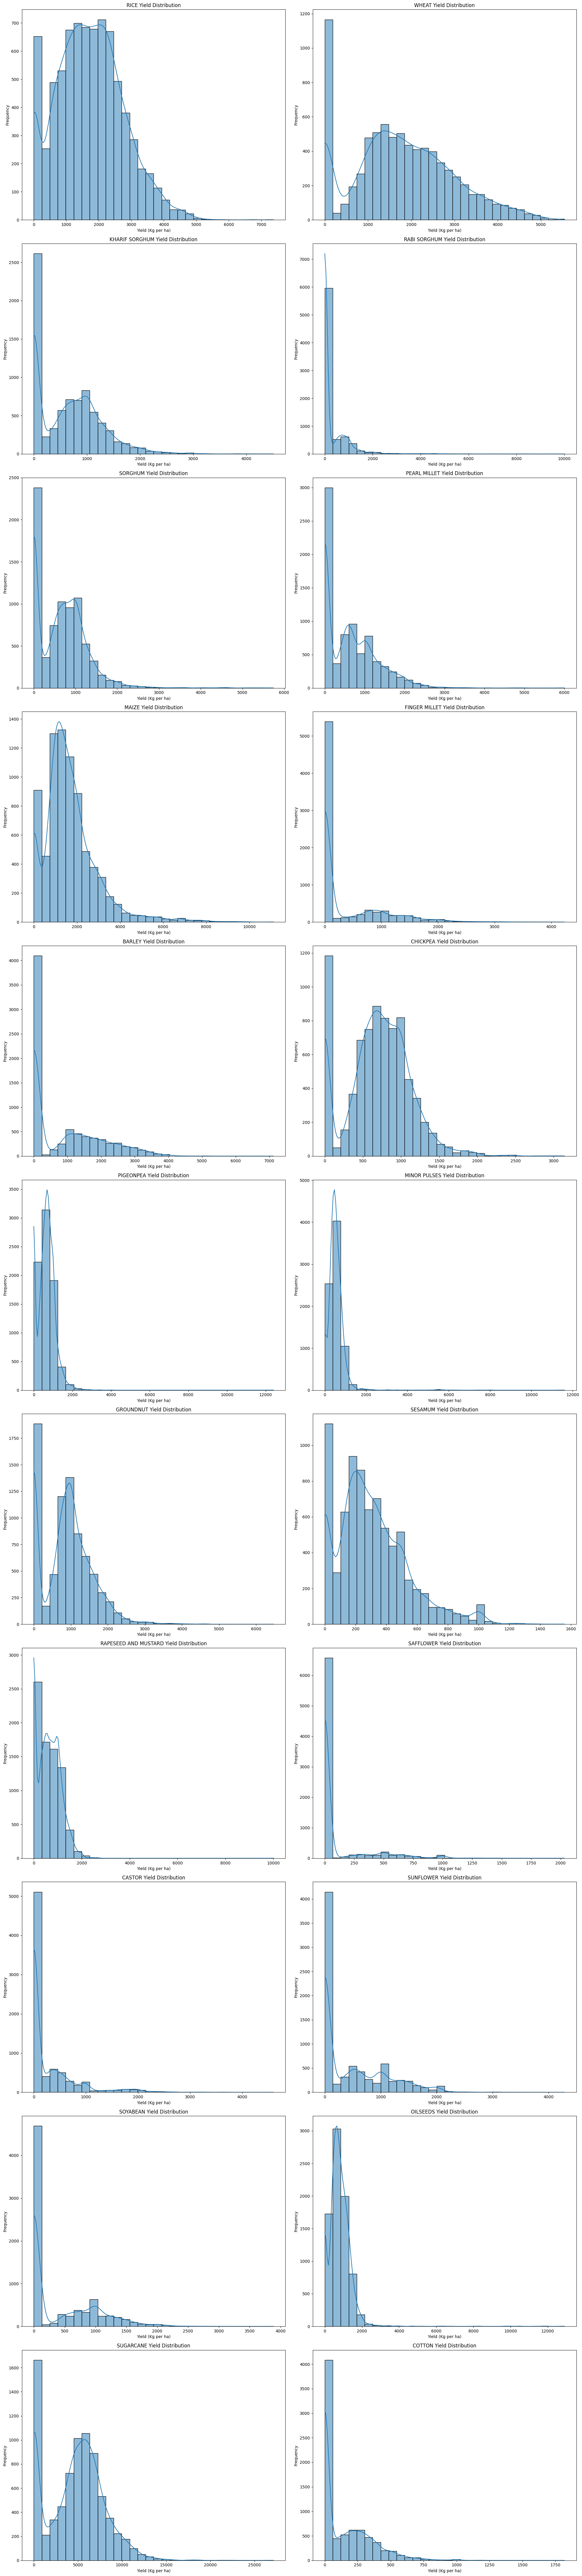

In [15]:
# Set up a grid of subplots. Adjust n_cols and figsize as needed.
n_cols = 2
n_rows = (len(crops) + n_cols - 1) // n_cols
plt.figure(figsize=(20, n_rows * 8))

# Loop over each crop to create a histogram for its yield.
for i, crop in enumerate(crops, 1):
    col_name = f"{crop} YIELD (Kg per ha)"
    plt.subplot(n_rows, n_cols, i)
    # Drop NA values to avoid errors and plot a histogram with KDE for a smooth distribution.
    sns.histplot(crop_data[col_name].dropna(), bins=30, kde=True, edgecolor='black')
    plt.title(f"{crop} Yield Distribution")
    plt.xlabel("Yield (Kg per ha)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
crop_data[['RICE AREA (1000 ha)']].boxplot()
plt.show()

In [ ]:
sns.pairplot(crop_data)